## Best Areas in Mumbai to set up a restaurant

#### Importing all the required libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import requests
%matplotlib inline

#### Reading CSV Files. One contains the postal codes in Mumbai and the other contains the latitude and longitude of all the postal codes

In [39]:
postal_df = pd.read_excel('Mumbai_postal_code_and_areas.xlsx')
postal_df.shape

(200, 2)

In [40]:
latlong_df = pd.read_csv('IN.txt', sep='\t', header=None)
latlong_df = latlong_df[[1,9,10]]
latlong_df.columns = ['Postal Code','Area Latitude','Area Longitude']
latlong_df = latlong_df.drop_duplicates(subset='Postal Code').reset_index(drop=True)
latlong_df

,Postal Code,Area Latitude,Area Longitude
0,744101,11.6667,92.7500
1,744102,11.6833,92.7167
2,744103,11.6651,92.7121
3,744104,11.6651,92.7121
4,744105,11.6000,92.7333
...,...,...,...
19092,509408,12.3724,75.5674
19093,509409,16.6135,77.5694
19094,509410,17.0908,78.0836
19095,509411,16.8250,78.0932


#### Joining the two dataframes to create the final df for exploration

In [41]:
postal_df = postal_df.merge(latlong_df, on='Postal Code', how='left')
postal_df

,Area Name,Postal Code,Area Latitude,Area Longitude
0,Aareymilk Colony,400065,19.1699,72.8504
1,Agripada,400011,18.9833,72.8333
2,Airport,400099,19.2355,72.8468
3,A I Staff Colony,400029,18.9860,72.8259
4,Ambewadi,400004,18.9500,72.8167
...,...,...,...,...
195,Secretariate,400032,19.0167,72.8500
196,Seepz,400096,19.2355,72.8468
197,Sewri,400015,19.0000,72.8500
198,Sharma Estate,400063,19.1624,72.8694


### Using Foursquare API to explore the Area Names captured above

#### There are many factors that can make a place suitable or unsuitable for setting up a restaurant.
1. How many restaurants are already there in that area.
2. Total footfall in the area (Is the area trending)
3. How many popular places are near that area (Place Category)
4. Average ratings of all the places in the area (Can affect customer sentiment)

#### Defining Foursquare API details. Do note that the radius and limit to be used to explore the places have been set to 300 and 5 respectively, to limit the total venues to 500 (Foursquare Premium Call Limit). This could lead to unavailability of data for some areas.

In [103]:
client_id = 'REDACTED'
client_secret = 'REDACTED'
version = '20200223'
radius = 300
limit = 5
explore_url = 'https://api.foursquare.com/v2/venues/explore'
venue_url = 'https://api.foursquare.com/v2/venues/{}'
payload = {'client_id':client_id, 'client_secret': client_secret, 'v': version, 'll': '19.2960,72.8487', 'radius': radius, 'limit': limit}

#### Here the foursquare explore API is used to get all the recommended places near the postal areas and capture the place ID for later usage. A new dataframe is created in the process.

In [104]:
places_df = pd.DataFrame()
count = 0
for index in range(len(postal_df)):
    payload['ll'] = '{},{}'.format(postal_df.loc[index,'Area Latitude'], postal_df.loc[index, 'Area Longitude'])
    request = requests.get(explore_url, params=payload)
    resp = request.json()
    try:
        print('-------------------')
        print(postal_df.loc[index, 'Area Name'])
        for item in resp['response']['groups'][0]['items']:
            count=count+1
            print(item['venue']['id'])
            row_dict = {'Area Name': [postal_df.loc[index, 'Area Name']], 'Place Name': [item['venue']['name']], 'Place ID': [item['venue']['id']]}
            temp_df = pd.DataFrame.from_dict(row_dict)
            places_df = places_df.append(temp_df, ignore_index=True)
    except KeyError:
        print("ERROR")
        print(resp)
print(count)

-------------------
Aareymilk Colony
4f1f7d2de4b035766ae03d1d
4f35c9abe4b0d408a2b0e02c
-------------------
Agripada
4dc6b229d4c0ad9c0fa6b32e
-------------------
Airport
4c1bb3d2b4e62d7f5cd3d993
51860dea498e75946cff6d0e
56349dcf498ee35b2bcf59d2
4dedbd1a7d8bb216742b9511
-------------------
A I Staff Colony
4b710840f964a520c6372de3
4f5b2767e4b0c4b6887ed82b
512f7f97e4b008bf02947ced
4e9699a6f5b91722c6f274f1
-------------------
Ambewadi
4b0587ccf964a5201fa222e3
4dd7feb252b1a5c6445ad165
4e2963a31f6e88a1546b6a8b
4dfdb829d4c001cca370f204
4b0587d5f964a5209da322e3
-------------------
Andheri
5171fb17498ee3a439f76198
4fec524fe4b0961013aca7ef
4ece83c60e61efa32edd7073
5380af1c498ede9f52bd0e6e
-------------------
Andheri East
-------------------
Andheri Railway Station
5d498bef4411870008ab039e
5b28ec69b37e2b002c1ea49b
-------------------
Antop Hill
4bee8b57e8c3c928d9c89892
533a669b498ee47169ed04ee
4da6d8637aba26680ee99770
4e882bd7cc215dee9d2494f7
-------------------
Anushakti Nagar
4c1bb3d2b4e62d7f5c

-------------------
Kalachowki
4bee8b57e8c3c928d9c89892
533a669b498ee47169ed04ee
4da6d8637aba26680ee99770
4e882bd7cc215dee9d2494f7
-------------------
Kalbadevi
-------------------
Kamathipura
5c1e1351971317002edf324c
5c063fcfd48ec1002c8298f8
-------------------
Kandivali East
-------------------
Kandivali East Extn Counter
-------------------
Kandivali RS
4f1f7d2de4b035766ae03d1d
4f35c9abe4b0d408a2b0e02c
-------------------
Kandivali West
4f1f7d2de4b035766ae03d1d
4f35c9abe4b0d408a2b0e02c
-------------------
Kannamwar Nagar
591be7088fb09e788daf5a7f
50d3e551e4b096a1ccec84ed
-------------------
Kapad Bazar
-------------------
Ketkipada
4ec9041849010f98ce53b3e3
4efecf162c5b66f33b4e2ebd
-------------------
Khar Colony
5bd9a27ed69ed0002c4d3eff
-------------------
Khar Delivery
5bd9a27ed69ed0002c4d3eff
-------------------
Kharodi
4c1bb3d2b4e62d7f5cd3d993
51860dea498e75946cff6d0e
56349dcf498ee35b2bcf59d2
4dedbd1a7d8bb216742b9511
-------------------
Kherwadi
-------------------
Kidwai Nagar
4b

-------------------
Sakinaka
4d63eff0625f6dcbdb32715e
-------------------
Sandeepany Sadhanalya
591be7088fb09e788daf5a7f
50d3e551e4b096a1ccec84ed
-------------------
Santacruz
5d498bef4411870008ab039e
5b28ec69b37e2b002c1ea49b
-------------------
Santacruz Central
5d498bef4411870008ab039e
5b28ec69b37e2b002c1ea49b
-------------------
Santacruz P&t Colony
4b710840f964a520c6372de3
4f5b2767e4b0c4b6887ed82b
512f7f97e4b008bf02947ced
4e9699a6f5b91722c6f274f1
-------------------
S.B. Road
4d2afc4f068e8cfaa294de4c
4ef5db88775b54cdb3262ab5
4d306e235f806dcb464f19ac
4c92f0386cfea093ab4bb68b
-------------------
S.C. Court
-------------------
Secretariate
4bee8b57e8c3c928d9c89892
533a669b498ee47169ed04ee
4da6d8637aba26680ee99770
4e882bd7cc215dee9d2494f7
-------------------
Seepz
4c1bb3d2b4e62d7f5cd3d993
51860dea498e75946cff6d0e
56349dcf498ee35b2bcf59d2
4dedbd1a7d8bb216742b9511
-------------------
Sewri
4f439e60e4b0804937fbb392
4f3fdad3e4b04da19f86c9a9
4f4c1424e4b0acb4660c2b49
56878f7a38fabef8101f4d7f

In [108]:
places_df

,Area Name,Place Name,Place ID
0,Aareymilk Colony,Pandurang Wadi,4f1f7d2de4b035766ae03d1d
1,Aareymilk Colony,Gogatewadi,4f35c9abe4b0d408a2b0e02c
2,Agripada,Nirmal Park,4dc6b229d4c0ad9c0fa6b32e
3,Airport,Cafe Coffee Day,4c1bb3d2b4e62d7f5cd3d993
4,Airport,Noor Caterers & Biryani Center,51860dea498e75946cff6d0e
...,...,...,...
447,Shivaji Nagar,JW Marriott Mumbai Juhu,4b0587c9f964a520bca122e3
448,Shivaji Nagar,JW Marriot executive lounge,52aa9b74498eb5fe30e95a65
449,Shivaji Nagar,Arola @ JW Marriott,4fd38ff3e4b0191b9bfca5c8
450,Shivaji Nagar,Quan Spa,4b0587e7f964a52072a622e3


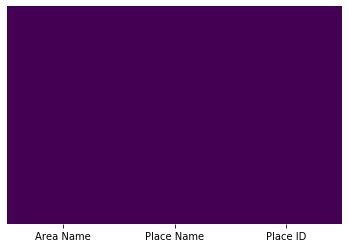

In [109]:
# Checking if we have any null values in the Place ID column
sns.heatmap(places_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Since there are no null values, we can move forward with getting the details of the venue

#### Here the foursquare venue API is used to get all the important details about the venue. The details includes the category, Ratings, Total Tips received, footfalls, likes and dislikes.

#### Point worth noting is that a place can be flooded with different other restaurants / eateries and such a place might be/not be suitable to open a restaurant. This factor is handled by the category column. If all the category points to a restaurant, then the frequency will be captured (in later section)

#### Assigning a default value of Zero. Not planning to skip such rows as the data is already limited. This is also meant to penalise the places that doesnt have a rating or tips.

In [129]:
places_info_df = pd.DataFrame()
for index in range(len(places_df)):
    request = requests.get(venue_url.format(places_df.loc[index, 'Place ID']), params=payload)
    resp = request.json()
    print('-----------------')
    print(places_df.loc[index, 'Place ID'])
    category = resp['response']['venue']['categories'][0]['name']
#     footfall = resp['response']['venue']['stats']['visitsCount']
#     unique_users = resp['response']['venue']['stats']['usersCount']
    try:
        ratings = resp['response']['venue']['rating']
    except KeyError:
        ratings = 0
        
    try:
         tips = resp['response']['venue']['stats']['tipCount']
    except KeyError:
        tips = 0
        
    try:
        likes = resp['response']['venue']['likes']['count']
    except:
        likes = 0
        
    print(category)
    print(ratings)
    print(tips)
    print(likes)
    row_dict = {'Area Name': [places_df.loc[index, 'Area Name']],
                'Place ID': [places_df.loc[index, 'Place ID']],
                'Place Category': [category],
                'Place Rating': [ratings],
                'Total Tips': [tips],
                'Total Likes': [likes]}
    temp_df = pd.DataFrame.from_dict(row_dict)
    places_info_df = places_info_df.append(temp_df, ignore_index=True)
places_info_df

-----------------
4f1f7d2de4b035766ae03d1d
Smoke Shop
5.7
2
4
-----------------
4f35c9abe4b0d408a2b0e02c
Garden
0
0
0
-----------------
4dc6b229d4c0ad9c0fa6b32e
Outdoors & Recreation
0
0
1
-----------------
4c1bb3d2b4e62d7f5cd3d993
Café
6.2
6
0
-----------------
51860dea498e75946cff6d0e
Indian Restaurant
0
1
0
-----------------
56349dcf498ee35b2bcf59d2
Restaurant
0
4
5
-----------------
4dedbd1a7d8bb216742b9511
Ice Cream Shop
0
1
2
-----------------
4b710840f964a520c6372de3
Indian Restaurant
0
2
0
-----------------
4f5b2767e4b0c4b6887ed82b
Tea Room
0
0
0
-----------------
512f7f97e4b008bf02947ced
Women's Store
0
0
0
-----------------
4e9699a6f5b91722c6f274f1
Food
0
0
0
-----------------
4b0587ccf964a5201fa222e3
Juice Bar
7.6
22
41
-----------------
4dd7feb252b1a5c6445ad165
Food Truck
7.1
1
7
-----------------
4e2963a31f6e88a1546b6a8b
Train Station
6.6
14
10
-----------------
4dfdb829d4c001cca370f204
Grocery Store
0
0
0
-----------------
4b0587d5f964a5209da322e3
Japanese Restaurant
0
1


-----------------
4bc41fdcf8219c746401b710
Plaza
6.1
16
20
-----------------
4e8576d59adf071fee1cdf85
Jewelry Store
0
0
4
-----------------
4e394081e4cd799aaeee9825
Grocery Store
0
2
0
-----------------
4ec9041849010f98ce53b3e3
Clothing Store
0
0
0
-----------------
4efecf162c5b66f33b4e2ebd
Kids Store
0
0
0
-----------------
4ec9041849010f98ce53b3e3
Clothing Store
0
0
0
-----------------
4efecf162c5b66f33b4e2ebd
Kids Store
0
0
0
-----------------
5bd9a27ed69ed0002c4d3eff
Food & Drink Shop
0
0
0
-----------------
4f1f7d2de4b035766ae03d1d
Smoke Shop
5.7
2
4
-----------------
4f35c9abe4b0d408a2b0e02c
Garden
0
0
0
-----------------
4b5bf06cf964a5201c1e29e3
Bus Station
0
2
0
-----------------
50134083e4b0c3be97250125
Train Station
0
1
0
-----------------
4b5bf06cf964a5201c1e29e3
Bus Station
0
2
0
-----------------
50134083e4b0c3be97250125
Train Station
0
1
0
-----------------
4b0587c9f964a520bca122e3
Hotel
8.5
84
214
-----------------
52aa9b74498eb5fe30e95a65
Lounge
8.2
1
10
---------------

-----------------
51860dea498e75946cff6d0e
Indian Restaurant
0
1
0
-----------------
56349dcf498ee35b2bcf59d2
Restaurant
0
4
5
-----------------
4dedbd1a7d8bb216742b9511
Ice Cream Shop
0
1
2
-----------------
51990229498e2a7929ba0a78
Indian Restaurant
6.9
3
10
-----------------
52d01f78498e6b1b5f527e2a
Multiplex
6.7
5
43
-----------------
4f2aa96de4b0d4e47db170f4
Beach
0
0
0
-----------------
515723dce4b03dbb54d1ec3d
Ice Cream Shop
0
0
1
-----------------
5c1e1351971317002edf324c
Resort
0
0
0
-----------------
5c063fcfd48ec1002c8298f8
Night Market
0
0
0
-----------------
51f97bb3498e7b8364fd3f78
Indian Restaurant
7.1
8
16
-----------------
4c1f287763750f472cbbba67
Restaurant
7.0
4
6
-----------------
4dce3c94c65bdac7135c2beb
Indian Restaurant
7.0
6
10
-----------------
4e9004f0e5fa2c09eb2bfc68
American Restaurant
6.4
2
10
-----------------
4bee8b57e8c3c928d9c89892
Vegetarian / Vegan Restaurant
6.2
4
6
-----------------
533a669b498ee47169ed04ee
Coffee Shop
6.1
1
2
-----------------
4da6

-----------------
4e882bd7cc215dee9d2494f7
Bakery
0
4
2
-----------------
4f1f7d2de4b035766ae03d1d
Smoke Shop
5.7
2
4
-----------------
4f35c9abe4b0d408a2b0e02c
Garden
0
0
0
-----------------
4b710840f964a520c6372de3
Indian Restaurant
0
2
0
-----------------
4f5b2767e4b0c4b6887ed82b
Tea Room
0
0
0
-----------------
512f7f97e4b008bf02947ced
Women's Store
0
0
0
-----------------
4e9699a6f5b91722c6f274f1
Food
0
0
0
-----------------
4d63eff0625f6dcbdb32715e
Playground
0
0
5
-----------------
4c1bb3d2b4e62d7f5cd3d993
Café
6.2
6
0
-----------------
51860dea498e75946cff6d0e
Indian Restaurant
0
1
0
-----------------
56349dcf498ee35b2bcf59d2
Restaurant
0
4
5
-----------------
4dedbd1a7d8bb216742b9511
Ice Cream Shop
0
1
2
-----------------
4bee8b57e8c3c928d9c89892
Vegetarian / Vegan Restaurant
6.2
4
6
-----------------
533a669b498ee47169ed04ee
Coffee Shop
6.1
1
2
-----------------
4da6d8637aba26680ee99770
Shoe Store
0
0
0
-----------------
4e882bd7cc215dee9d2494f7
Bakery
0
4
2
-----------------

,Area Name,Place ID,Place Category,Place Rating,Total Tips,Total Likes
0,Aareymilk Colony,4f1f7d2de4b035766ae03d1d,Smoke Shop,5.7,2,4
1,Aareymilk Colony,4f35c9abe4b0d408a2b0e02c,Garden,0.0,0,0
2,Agripada,4dc6b229d4c0ad9c0fa6b32e,Outdoors & Recreation,0.0,0,1
3,Airport,4c1bb3d2b4e62d7f5cd3d993,Café,6.2,6,0
4,Airport,51860dea498e75946cff6d0e,Indian Restaurant,0.0,1,0
...,...,...,...,...,...,...
447,Shivaji Nagar,4b0587c9f964a520bca122e3,Hotel,8.5,84,214
448,Shivaji Nagar,52aa9b74498eb5fe30e95a65,Lounge,8.2,1,10
449,Shivaji Nagar,4fd38ff3e4b0191b9bfca5c8,Spanish Restaurant,8.0,18,26
450,Shivaji Nagar,4b0587e7f964a52072a622e3,Spa,7.9,5,4


### Initial Analysis: From the above data, places such as Train Station or Restaurants or Lounges have better ratings and tips than some other places such as Shoe Store or Playground or Grocery Store or Pharmacy. This would help in clustering these places as opening a restaurant near a shoe store or a grocery store wouldnt gather as much attention than a restaurant near an already popular venue.

In [130]:
# As a backup
temp_info_df = places_info_df.copy()

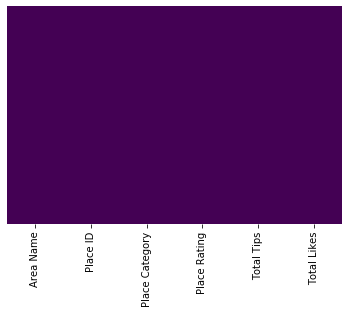

In [131]:
# Check if any row has a null value. Much less likely as that was already handled.
sns.heatmap(places_info_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Here the category column is encoded to be a numerical value using dummy variables. Other important columns are then added and a new dataframe is created.

In [146]:
places_info_one_hot = pd.get_dummies(data=places_info_df['Place Category'], drop_first=False)
places_info_one_hot.insert(0,'Area Name',places_info_df['Area Name'])
places_info_one_hot.insert(1,'Place Ratings',places_info_df['Place Rating'])
places_info_one_hot.insert(2,'Average Tips',places_info_df['Total Tips'])
places_info_one_hot.insert(3,'Likes',places_info_df['Total Likes'])
places_info_one_hot

,Area Name,Place Ratings,Average Tips,Likes,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,Bar,...,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Aareymilk Colony,5.7,2,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Aareymilk Colony,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agripada,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airport,6.2,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airport,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Shivaji Nagar,8.5,84,214,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,Shivaji Nagar,8.2,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,Shivaji Nagar,8.0,18,26,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
450,Shivaji Nagar,7.9,5,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### This is an important step where the rows are grouped by Area Name, and mean is taken of the rows. This will give us the frequency of occurence of each category and also normalizes / averages other columns (Ratings, likes, tips). The dataframe finally created will be used for clustering.

In [147]:
places_info_one_hot = places_info_one_hot.groupby('Area Name').mean().reset_index()
places_info_one_hot

,Area Name,Place Ratings,Average Tips,Likes,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,Bar,...,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,A I Staff Colony,0.000,0.50,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.25
1,Aareymilk Colony,2.850,1.00,2.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.00,0.00
2,Agripada,0.000,0.00,1.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
3,Airport,1.550,3.00,1.75,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,Ambewadi,4.260,7.60,11.80,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Secretariate,3.075,2.25,2.50,0.0,0.0,0.0,0.25,0.0,0.0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.00
148,Seepz,1.550,3.00,1.75,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
149,Sewri,0.000,0.25,0.25,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
150,Sharma Estate,0.000,0.00,0.00,0.0,0.5,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [148]:
# Using StandardScaler to normalize the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(places_info_one_hot[['Place Ratings','Average Tips','Likes']])
scaled_values = scaler.transform(places_info_one_hot[['Place Ratings','Average Tips','Likes']])
temp = pd.DataFrame(scaled_values, columns=['Place Ratings','Average Tips','Likes'])
temp

,Place Ratings,Average Tips,Likes
0,-0.757111,-0.414005,-0.403637
1,0.385479,-0.337524,-0.279472
2,-0.757111,-0.490487,-0.341555
3,-0.135702,-0.031599,-0.294993
4,0.950760,0.672029,0.328934
...,...,...,...
147,0.475683,-0.146321,-0.248431
148,-0.135702,-0.031599,-0.294993
149,-0.757111,-0.452246,-0.388116
150,-0.757111,-0.490487,-0.403637


In [149]:
# Adding back scaled columns
places_info_one_hot.drop(['Place Ratings','Average Tips','Likes'], inplace=True, axis=1)
places_info_one_hot.insert(1, 'Place Ratings', temp['Place Ratings'])
places_info_one_hot.insert(2, 'Average Tips', temp['Average Tips'])
places_info_one_hot.insert(3, 'Likes', temp['Likes'])
places_info_one_hot

,Area Name,Place Ratings,Average Tips,Likes,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,Bar,...,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,A I Staff Colony,-0.757111,-0.414005,-0.403637,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.25
1,Aareymilk Colony,0.385479,-0.337524,-0.279472,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.00,0.00
2,Agripada,-0.757111,-0.490487,-0.341555,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
3,Airport,-0.135702,-0.031599,-0.294993,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,Ambewadi,0.950760,0.672029,0.328934,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Secretariate,0.475683,-0.146321,-0.248431,0.0,0.0,0.0,0.25,0.0,0.0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.00
148,Seepz,-0.135702,-0.031599,-0.294993,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
149,Sewri,-0.757111,-0.452246,-0.388116,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
150,Sharma Estate,-0.757111,-0.490487,-0.403637,0.0,0.5,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


#### The above dataframe can now be used for Kmeans clustering.

#### Finally using Kmeans clustering algorith to create clusers based on all the details provided. The number of clusters needs to be an optimal and can also be dependednt on the business case.

In [155]:
from sklearn.cluster import KMeans
no_of_clusters= 3 # Do for other number of clusters too
places__clustering = places_info_one_hot.drop('Area Name', axis=1)
kmeans = KMeans(n_clusters=no_of_clusters, random_state=0).fit(places__clustering)

In [156]:
kmeans.labels_

array([0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1])

#### Creating one last dataframe to collate all the data along with cluster labels. This will be used to understand the clusters later.

In [161]:
# DF to analyze clusters
analyze_df = places_info_one_hot.copy()
analyze_df.insert(0, 'Cluster Labels', kmeans.labels_)
analyze_df = analyze_df.merge(postal_df, on='Area Name', how='left')
analyze_df

,Cluster Labels,Area Name,Place Ratings,Average Tips,Likes,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,...,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Postal Code,Area Latitude,Area Longitude
0,0,A I Staff Colony,-0.757111,-0.414005,-0.403637,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.25,0.0,0.00,0.25,400029,18.9860,72.8259
1,2,Aareymilk Colony,0.385479,-0.337524,-0.279472,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400065,19.1699,72.8504
2,0,Agripada,-0.757111,-0.490487,-0.341555,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400011,18.9833,72.8333
3,0,Airport,-0.135702,-0.031599,-0.294993,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400099,19.2355,72.8468
4,2,Ambewadi,0.950760,0.672029,0.328934,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.2,0.00,0.00,400004,18.9500,72.8167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,Secretariate,0.475683,-0.146321,-0.248431,0.0,0.0,0.0,0.25,0.0,...,0.0,0.0,0.0,0.00,0.0,0.25,0.00,400032,19.0167,72.8500
148,0,Seepz,-0.135702,-0.031599,-0.294993,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400096,19.2355,72.8468
149,0,Sewri,-0.757111,-0.452246,-0.388116,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400015,19.0000,72.8500
150,0,Sharma Estate,-0.757111,-0.490487,-0.403637,0.0,0.5,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,400063,19.1624,72.8694


#### Using the folium library to create an interactive map to visualize the clusters and understand where the grouping are on the map on Mumbai.

In [162]:
# Folium Map with all the clusters
import matplotlib.cm as cm
import matplotlib.colors as colors

mumbai_lat = 19.0760
mumbai_lon = 72.8777
mumbai_map = folium.Map(location=[mumbai_lat, mumbai_lon], zoom_start=10)

# set color scheme for the clusters
x = np.arange(no_of_clusters)
ys = [i + x + (i*x)**2 for i in range(no_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(analyze_df['Area Latitude'], analyze_df['Area Longitude'], analyze_df['Area Name'], analyze_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mumbai_map)
       
mumbai_map

#### Making sense out of the formed clusters. The analyze_df is compressed to give statistics on the clusters formed.

In [183]:
final_df = analyze_df.groupby('Cluster Labels').mean().reset_index()
final_df

,Cluster Labels,Place Ratings,Average Tips,Likes,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,Bar,...,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Postal Code,Area Latitude,Area Longitude
0,0,-0.683611,-0.407837,-0.337883,0.000000,0.010753,0.005376,0.005376,0.005376,0.000000,...,0.005376,0.000000,0.000000,0.026882,0.010753,0.005376,0.026882,400053.591398,19.019981,72.975667
1,1,2.462759,3.919206,4.103538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.114286,0.114286,0.000000,0.000000,0.000000,0.000000,400040.000000,19.059314,72.825471
2,2,0.891087,0.201816,0.051892,0.019231,0.000000,0.000000,0.067308,0.011538,0.024038,...,0.000000,0.000000,0.000000,0.000000,0.027885,0.083654,0.000000,400038.846154,19.064019,72.851181


#### Just from the above data, it can be said that cluster 1 is the one with top tier venues, gathering highest ratings and likes and tips. The places in this cluster should have the highest footfall and should be trending more than the places in other two clusters. Area Names in this cluster are --

In [184]:
analyze_df[analyze_df['Cluster Labels'] == 1]['Area Name']

19       Bhandup East
43        D.M. Colony
72               Juhu
89               Madh
114     Nariman Point
119    New Yogakshema
151     Shivaji Nagar
Name: Area Name, dtype: object

In [185]:
category_df = analyze_df.drop(['Area Name','Cluster Labels','Place Ratings','Average Tips','Likes','Postal Code','Area Latitude','Area Longitude'], axis = 1)
category_df

,American Restaurant,Astrologer,Athletics & Sports,Bakery,Bank,Bar,Beach,Bengali Restaurant,Bike Rental / Bike Share,Breakfast Spot,...,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.25
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.00,0.00
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,...,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.00
148,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
149,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
150,0.0,0.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [186]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [187]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
category_sorted = pd.DataFrame(columns=columns)
category_sorted['Area Name'] = analyze_df['Area Name']

for ind in np.arange(category_df.shape[0]):
    category_sorted.iloc[ind, 1:] = return_most_common_venues(category_df.iloc[ind, :], num_top_venues)

category_sorted

,Area Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A I Staff Colony,Women's Store,Indian Restaurant,Tea Room,Food,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop
1,Aareymilk Colony,Garden,Smoke Shop,Women's Store,Clothing Store,Grocery Store,Gift Shop,Food Truck,Food & Drink Shop,Food,Flea Market
2,Agripada,Outdoors & Recreation,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food,Flea Market
3,Airport,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
4,Ambewadi,Grocery Store,Train Station,Japanese Restaurant,Juice Bar,Food Truck,Coffee Shop,Gift Shop,Garden,Food & Drink Shop,Food
...,...,...,...,...,...,...,...,...,...,...,...
147,Secretariate,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
148,Seepz,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
149,Sewri,Flea Market,Breakfast Spot,Nightclub,Convenience Store,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck
150,Sharma Estate,Astrologer,Pet Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food,Flea Market


In [188]:
category_sorted.insert(0, 'Cluster Labels', analyze_df['Cluster Labels'])
category_sorted.insert(2, 'Average Tips', analyze_df['Average Tips'])
category_sorted.insert(3, 'Likes', analyze_df['Likes'])
category_sorted.insert(4, 'Place Ratings', analyze_df['Place Ratings'])
category_sorted

,Cluster Labels,Area Name,Average Tips,Likes,Place Ratings,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,A I Staff Colony,-0.414005,-0.403637,-0.757111,Women's Store,Indian Restaurant,Tea Room,Food,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop
1,2,Aareymilk Colony,-0.337524,-0.279472,0.385479,Garden,Smoke Shop,Women's Store,Clothing Store,Grocery Store,Gift Shop,Food Truck,Food & Drink Shop,Food,Flea Market
2,0,Agripada,-0.490487,-0.341555,-0.757111,Outdoors & Recreation,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food,Flea Market
3,0,Airport,-0.031599,-0.294993,-0.135702,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
4,2,Ambewadi,0.672029,0.328934,0.950760,Grocery Store,Train Station,Japanese Restaurant,Juice Bar,Food Truck,Coffee Shop,Gift Shop,Garden,Food & Drink Shop,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,Secretariate,-0.146321,-0.248431,0.475683,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
148,0,Seepz,-0.031599,-0.294993,-0.135702,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
149,0,Sewri,-0.452246,-0.388116,-0.757111,Flea Market,Breakfast Spot,Nightclub,Convenience Store,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck
150,0,Sharma Estate,-0.490487,-0.403637,-0.757111,Astrologer,Pet Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food,Flea Market


#### Looking at cluster 1

In [190]:
category_sorted[category_sorted['Cluster Labels'] == 1]

,Cluster Labels,Area Name,Average Tips,Likes,Place Ratings,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,1,Bhandup East,3.517133,3.259218,2.482232,Hotel,Lounge,Indian Restaurant,Spanish Restaurant,Spa,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
43,1,D.M. Colony,3.517133,3.259218,2.482232,Hotel,Lounge,Indian Restaurant,Spanish Restaurant,Spa,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
72,1,Juhu,3.517133,3.259218,2.482232,Hotel,Lounge,Indian Restaurant,Spanish Restaurant,Spa,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
89,1,Madh,5.719794,2.936390,2.522323,Ice Cream Shop,Indian Restaurant,Bengali Restaurant,Mexican Restaurant,Cupcake Shop,Convenience Store,Grocery Store,Gift Shop,Garden,Food Truck
114,1,Nariman Point,3.823058,6.375750,2.394032,Coffee Shop,Movie Theater,Diner,Sandwich Place,Scenic Lookout,Convenience Store,Cosmetics Shop,Cupcake Shop,Women's Store,Clothing Store
119,1,New Yogakshema,3.823058,6.375750,2.394032,Coffee Shop,Movie Theater,Diner,Sandwich Place,Scenic Lookout,Convenience Store,Cosmetics Shop,Cupcake Shop,Women's Store,Clothing Store
151,1,Shivaji Nagar,3.517133,3.259218,2.482232,Hotel,Lounge,Indian Restaurant,Spanish Restaurant,Spa,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market


#### This cluster is full of places with:
1. Hotels
2. Lounge
3. Coffee Shops
4. Restaurants
5. Spa

The places in this clusters will pose a heavy competition to any new restaurant until the restaurant want to serve only the top tier customers and have the money to fight the competition and sustain itself.
Areas in this cluster can be deemed as UNSAFE for new restaurants.

In [192]:
#### Looking at Cluster 0

In [197]:
category_sorted[category_sorted['Cluster Labels'] == 0]

,Cluster Labels,Area Name,Average Tips,Likes,Place Ratings,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,A I Staff Colony,-0.414005,-0.403637,-0.757111,Women's Store,Indian Restaurant,Tea Room,Food,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop
2,0,Agripada,-0.490487,-0.341555,-0.757111,Outdoors & Recreation,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food,Flea Market
3,0,Airport,-0.031599,-0.294993,-0.135702,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
5,0,Andheri,-0.414005,-0.372596,-0.757111,Athletics & Sports,Bakery,Snack Place,Bike Rental / Bike Share,Women's Store,Food,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
6,0,Andheri Railway Station,-0.490487,-0.403637,-0.757111,Home Service,Business Service,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,Santacruz Central,-0.490487,-0.403637,-0.757111,Home Service,Business Service,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food
146,0,Santacruz P&t Colony,-0.414005,-0.403637,-0.757111,Women's Store,Indian Restaurant,Tea Room,Food,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop
148,0,Seepz,-0.031599,-0.294993,-0.135702,Ice Cream Shop,Indian Restaurant,Café,Restaurant,Flea Market,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Food
149,0,Sewri,-0.452246,-0.388116,-0.757111,Flea Market,Breakfast Spot,Nightclub,Convenience Store,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck


#### Places in cluster 0 have very low ratings and likes. 

This could be due to the fact that the ratings and tips were set to zero if they were not available.

This also infers that the places in these areas were not rated in the first place. This could be due to less footfall or the area just not being weekend friendly.

Looking at the top categories in the cluster, we see that there are very few restaurants / eateries in such places. Defining categories are:

1. Home Service
2. Outdoors and Recreation
3. Flea Markets
4. Lots of snack places

Opening restaurants in such areas is tricky and can be done by understanding if there is a need to actually open one.

Looking at a few areas such as Seepz, Airport, Santacruz, we see that places that fall in this category as mostly commercial, which also is line with the notion that these places can be 'not weekend friendly'.


#### Looking at Cluster 2

In [199]:
category_sorted[category_sorted['Cluster Labels'] == 2]

,Cluster Labels,Area Name,Average Tips,Likes,Place Ratings,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,Aareymilk Colony,-0.337524,-0.279472,0.385479,Garden,Smoke Shop,Women's Store,Clothing Store,Grocery Store,Gift Shop,Food Truck,Food & Drink Shop,Food,Flea Market
4,2,Ambewadi,0.672029,0.328934,0.950760,Grocery Store,Train Station,Japanese Restaurant,Juice Bar,Food Truck,Coffee Shop,Gift Shop,Garden,Food & Drink Shop,Food
7,2,Antop Hill,-0.146321,-0.248431,0.475683,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
11,2,B P T Colony,-0.146321,-0.248431,0.475683,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
12,2,B.P. Lane,0.274326,0.248227,1.999137,Indian Restaurant,Restaurant,Women's Store,Coffee Shop,Grocery Store,Gift Shop,Garden,Food Truck,Food & Drink Shop,Food
22,2,Bharat Nagar,0.029586,-0.267056,0.782379,Pizza Place,Bank,Food Truck,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Cosmetics Shop,Home Service,Grocery Store,Gift Shop
25,2,Borivali,2.607006,0.527597,0.515774,Clothing Store,Food Truck,Vegetarian / Vegan Restaurant,Train Station,Athletics & Sports,Convenience Store,Home Service,Grocery Store,Gift Shop,Garden
26,2,Borivali East,-0.337524,-0.279472,0.385479,Garden,Smoke Shop,Women's Store,Clothing Store,Grocery Store,Gift Shop,Food Truck,Food & Drink Shop,Food,Flea Market
28,2,C G S Colony,-0.146321,-0.248431,0.475683,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market
30,2,Century Mill,-0.146321,-0.248431,0.475683,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Shoe Store,Food,Cosmetics Shop,Cupcake Shop,Diner,Fast Food Restaurant,Flea Market


#### Areas in cluster 2 have limited / decent ratings and likes but looking at the top categories of the nearby venues, we see:
1. Grocery Store
2. Restaurants
3. Bakery
4. Coffee Shops
5. Womens Store
6. Clothing Store
7. Shopping Malls
8. Train Station

Due to the presence of Stores and Train Stations and Shopping Malls, it can be inferred that these places should have higher average footfalls. This is a very good factor for a new restaurants.

This has already been understood as we see a lot of restaurants and eateries around these areas. New and upcoming restaurants in these areas will have high competition but the higher footfall should compensate that.

All in all, the areas in this cluster should be relatively safe for new restaurants, not forgetting the higher competition.

------------------------------------------------ END OF NOTEBOOK -------------------------------------------------

#### Made By : Swapnil Arya
#### Github: https://github.com/REDswapnil